In [7]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from finding_nemo_dory import KNN

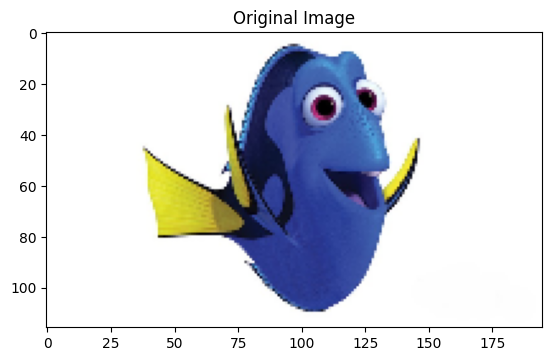

In [8]:
dory = cv2.imread("input/dory_train.png")
dory = cv2.resize(dory, (0, 0), None, .25, .25)
dory_hsv = cv2.cvtColor(dory, cv2.COLOR_BGR2HSV)
dory_rgb = cv2.cvtColor(dory, cv2.COLOR_BGR2RGB)
pixels_list_hsv = dory_hsv.reshape(-1, 3)

plt.imshow(dory_rgb)
plt.title("Original Image")
plt.show()

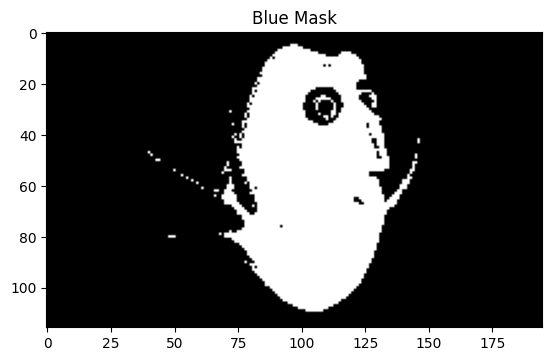

In [40]:
light_blue = (0, 0, 25)
dark_blue = (105, 155, 255)
blue_mask = cv2.inRange(dory_rgb, light_blue, dark_blue)

plt.imshow(blue_mask, "gray")
plt.title("Blue Mask")
plt.show()

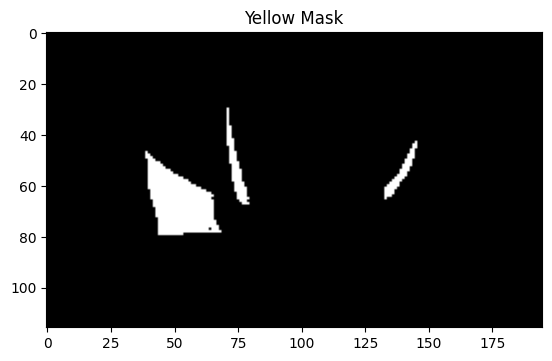

In [41]:
light_yellow = (150, 130, 30)
dark_yellow = (255, 255, 95)
yellow_mask = cv2.inRange(dory_rgb, light_yellow, dark_yellow)

plt.imshow(yellow_mask, "gray")
plt.title("Yellow Mask")
plt.show()

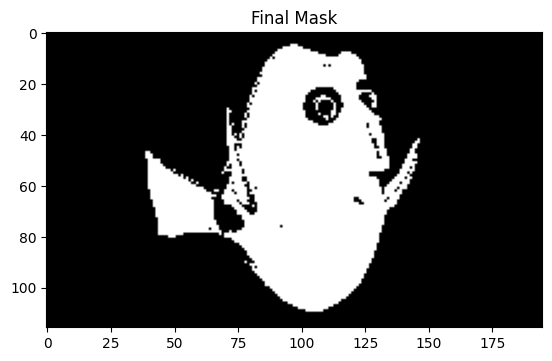

In [42]:
final_mask = blue_mask + yellow_mask
plt.imshow(final_mask, "gray")
plt.title("Final Mask")
plt.show()

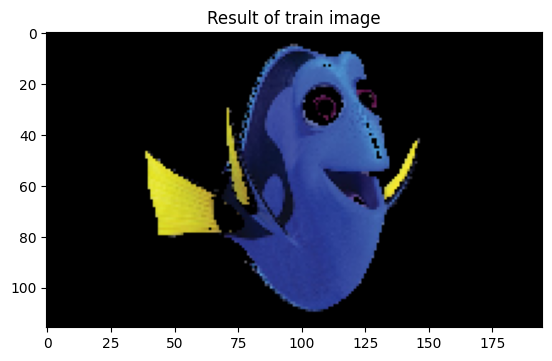

In [43]:
result = cv2.bitwise_and(dory_rgb, dory_rgb, mask=final_mask)
plt.imshow(result)
plt.title('Result of train image')
plt.show()

Pre process

In [44]:
x_train = pixels_list_hsv / 255
y_train = final_mask.reshape(-1, )

In [45]:
knn = KNN(3)
knn.fit(x_train, y_train)

In [46]:
new_dory = cv2.imread("input/dory_test.png")
new_dory_hsv = cv2.cvtColor(new_dory, cv2.COLOR_BGR2HSV)
new_dory_rgb = cv2.cvtColor(new_dory, cv2.COLOR_BGR2RGB)

In [47]:
x_test = new_dory_hsv.reshape(-1, 3) / 255
y_pred = knn.predict(x_test)

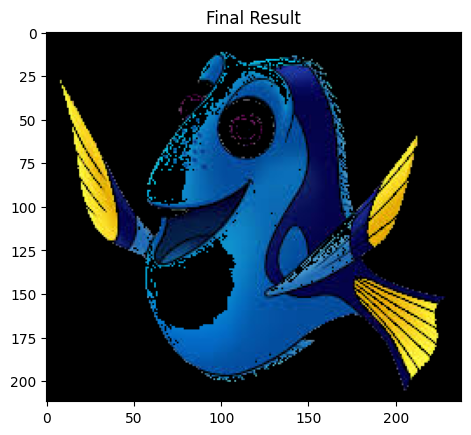

In [48]:
result = np.array(y_pred).reshape(new_dory.shape[:2])
result = result.astype('uint8')

final_result = cv2.bitwise_and(new_dory, new_dory, mask=result)
final_result = cv2.cvtColor(final_result, cv2.COLOR_BGR2RGB)
plt.imshow(final_result)
plt.title('Final Result')
plt.show()